__Title:__ Case Study 2: Logistic Regression  
__Authors:__ Will Butler, Robert (Reuven) Derner 
__Date:__ 9/18/23 

## Business Understanding

All right. So this week we have a problem coming to us from the medical community. We're looking specifically at a diabetes study. And the problem is hospital readmission.

Now we don't want people in hospitals. We want them to be well. And we certainly don't want them to be readmitted. This comes at a huge cost to the patient in terms of bills, lost wages, strain on their family and whatnot. So our goal is no readmission.

So for this study, what we're trying to do is we want to try to predict readmission of the patient within 30 days of initial hospitalization.
 
I actually do have a couple of questions about this particular assignment. And the first one is, well, pretty important to me. It's regarding the race category. And I don't understand its significance. It seems actually kind of like sorting patients with this criteria could be seen as racially biased or something. I mean, simply talking about identifying who was getting readmitted to the hospital. So I really don't understand why race matters.

OK. Absolutely. And thank you for bringing that up because I absolutely agree with you. Normally, this is not something that we would take into consideration. Sorting by race can bring in a lot of ethical considerations. In this case, we're talking about the medical community. We're talking about patients. And we do know that diabetes affects different demographics differently. So race actually could very well be a factor in this.

Now, that being said, I will leave it to you. As long as we can chart the trends accurately, I'm not as concerned about how we get there.

OK. Got it. Thank you. So my next question is all about all of these question marks that are in the data set. What's going on with that?

Yeah. The study took place over 10 years. There's something like 130 hospitals that they were pulling data from. There are a lot of people entering data into this study. And so there are holes. So we're just going to have to make the best recommendation we can based on the data that we have.


Data Source:

Provided by client with metadata dictionary regarding terms 

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import random
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio 
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

# Workbook settings
pd.set_option('display.max_columns', None)
random.seed(110)
pio.renderers.default='notebook'

In [ ]:
# Import data from github (next phase)
#url = 'https://github.com/cdholmes11/MSDS-7331-ML1-Labs/blob/main/Lab-1_Visualization_DataPreprocessing/data/Combined_Flights_2021_sample.csv?raw=true'
#flight_data_df = pd.read_csv(url, encoding = "utf-8")

In [3]:
# loacal Import (To be removed later)
data = pd.read_csv("C:/Users/robert.derner/OneDrive - Flagship Credit Acceptance/Documents/School/Quantifying The World/Case Study Two/diabetic_data.csv")
id_data_maps = pd.read_csv("C:/Users/robert.derner/OneDrive - Flagship Credit Acceptance/Documents/School/Quantifying The World/Case Study Two/IDs_mapping.csv")

## Data Quality
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [4]:
data.shape

(101766, 50)

In [5]:
id_data_maps.shape

(67, 2)

### Examine the data

In [6]:
data.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0                 1          ?  Pediatrics-Endocrinology                  41   
1                 3          ?                         ?                  59   
2                 2          ?                         ?                  11   
3                 2          ?                         ?                  44   
4                 1          ?                         ?                  51   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0               0                1                  0                 0   
1               0               18                  0                 0   
2               5               13                  2                 0   
3               1               16                  0                 0   
4               0                8                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0                 0  250.83       ?      ?                 1          None   
1                 0     276  250.01    255                 9          None   
2                 1     648     250    V27                 6          None   
3                 0       8  250.43    403                 7          None   
4                 0     197     157    250                 5          None   

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0      None        No          No          No             No          No   
1      None        No          No          No             No          No   
2      None        No          No          No             No          No   
3      None        No          No          No             No          No   
4      None        No          No          No             No          No   

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0            No        No        No          No           No            No   
1            No        No        No          No           No            No   
2            No    Steady        No          No           No            No   
3            No        No        No          No           No            No   
4            No    Steady        No          No           No            No   

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0       No       No           No         No      No          No      No   
1       No       No           No         No      No          No      Up   
2       No       No           No         No      No          No      No   
3       No       No           No         No      No          No      Up   
4       No       No           No         No      No          No  Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0                  No                  No                       No   
1                  No                  No                       No   
2                  No                  No                       No   
3                  No                  No                       No   
4        

In [7]:
id_data_maps.head()

admission_type_id    description
0                 1      Emergency
1                 2         Urgent
2                 3       Elective
3                 4        Newborn
4                 5  Not Available

__Missing Values__  
The dataset contains no missing values upon code examination, however there are many "?" contained within the dataset that would indicate missing values. We will have to look more closely at the features to examine the degree of missing data we will need. 

For the purposes of classification on the readmittance, we need to investigate further.

In [8]:
# Features with Null Values and Percent missing
null_df = pd.DataFrame(data[data.columns[data.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / data.shape[0] * 100),2)

null_df

Empty DataFrame
Columns: [Feature, Value, Percent]
Index: []

__Duplicate Values__  
There are 66 duplicate values in the data set. No action was needed.

In [9]:
# Duplicate record validation
data.duplicated().sum()

0

__Data Type Conversion__  
In this section we grouped all features by their correct data type and converted each to their coresponding group. This facilitates a much easier analysis into the statistics of each feature type.

In [6]:
# Features grouped by data type
cat_features = ['number_of_elements']
cont_features = ['mean_atomic_mass','wtd_mean_atomic_mass','gmean_atomic_mass','wtd_gmean_atomic_mass',
                 'entropy_atomic_mass','wtd_entropy_atomic_mass','range_atomic_mass','wtd_range_atomic_mass','std_atomic_mass',
                 'wtd_std_atomic_mass','mean_fie', 'wtd_mean_fie','gmean_fie','wtd_gmean_fie','entropy_fie','wtd_entropy_fie',
                 'range_fie','wtd_range_fie','std_fie','wtd_std_fie','mean_atomic_radius','wtd_mean_atomic_radius',
                 'gmean_atomic_radius','wtd_gmean_atomic_radius','entropy_atomic_radius','wtd_entropy_atomic_radius',
                 'range_atomic_radius','wtd_range_atomic_radius','std_atomic_radius','wtd_std_atomic_radius','mean_Density',
                 'wtd_mean_Density','gmean_Density','wtd_gmean_Density','entropy_Density','wtd_entropy_Density','range_Density',
                 'wtd_range_Density','std_Density','wtd_std_Density','mean_ElectronAffinity','wtd_mean_ElectronAffinity',
                 'gmean_ElectronAffinity','wtd_gmean_ElectronAffinity','entropy_ElectronAffinity','wtd_entropy_ElectronAffinity',
                 'range_ElectronAffinity','wtd_range_ElectronAffinity','std_ElectronAffinity','wtd_std_ElectronAffinity',
                 'mean_FusionHeat','wtd_mean_FusionHeat','gmean_FusionHeat','wtd_gmean_FusionHeat','entropy_FusionHeat',
                 'wtd_entropy_FusionHeat','range_FusionHeat','wtd_range_FusionHeat','std_FusionHeat','wtd_std_FusionHeat',
                 'mean_ThermalConductivity','wtd_mean_ThermalConductivity','gmean_ThermalConductivity',
                 'wtd_gmean_ThermalConductivity','entropy_ThermalConductivity','wtd_entropy_ThermalConductivity',
                 'range_ThermalConductivity','wtd_range_ThermalConductivity','std_ThermalConductivity',
                 'wtd_std_ThermalConductivity','mean_Valence','wtd_mean_Valence','gmean_Valence','wtd_gmean_Valence',
                 'entropy_Valence','wtd_entropy_Valence','range_Valence','wtd_range_Valence','std_Valence','wtd_std_Valence']

In [7]:
# Features converted to corresponding group type (may be interesting to convert to string)
# data[cat_features] = data[cat_features].astype("string")

__Outliers__  

In [12]:
# Histogram of Critical Temperature
fig = px.histogram(crit_temp_df, x="critical_temp", nbins = 20)
fig.show()

The most interesting detail of note from this table is the overall variation in the distribution of critical temperature. Noting that the range for when a superconductor goes critical can vary greatly between the low of 1 degree celeicus to a high of 144 degrees celicus.  In the little over 21,000 observations from the study, only 143 (0.67%) of superconductors reached critical temperatre at 80 degrees celiecus. There does appear to be some outliers in the data as the histogram reveals a right tailed distribution, we may want to logrithmically scale the data to standardize our analysis.  4155555555555555

In [8]:
# Box Plot - Critical Temp by Number of Elements (string)
fig = px.box(data[data['critical_temp']==True], x='number_of_elements',
             width=800, height=400, title='Box Plot -Number of Elements')
fig.show()

The above box plot indicates that during critical temperature the number of elements is 3 or below with an upper bound of 4 elements contained in the superconductor. There is a degree of outliers at 6 elements contained with the data does exist but the vast majoritiy of elements is three.  

## Simple Statistics
Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 
In the following code blocks, we explore the frequency of Cancelled and Delayed flights. Additionally, we use this section to explore any differences in our continuous features when grouped by the True and False levels of our dependent features.

In the following code blocks, we explore the frequncy of Cancelled and Delayed flights. Additionaly, we use this section to explore any differences in our continuous features when grouped by the True and False levels of our dependent features.

In [67]:
summary_stats = data.describe()

summary_stats_tb = summary_stats.transpose()

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:2f}'.format) # Format numeric values
print(summary_stats_tb)

                             count      mean       std      min       25%  \
number_of_elements    21263.000000  4.115224  1.439295 1.000000  3.000000   
mean_atomic_mass      21263.000000 87.557631 29.676497 6.941000 72.458076   
wtd_mean_atomic_mass  21263.000000 72.988310 33.490406 6.423452 52.143839   
gmean_atomic_mass     21263.000000 71.290627 31.030272 5.320573 58.041225   
wtd_gmean_atomic_mass 21263.000000 58.539916 36.651067 1.960849 35.248990   
...                            ...       ...       ...      ...       ...   
range_Valence         21263.000000  2.041010  1.242345 0.000000  1.000000   
wtd_range_Valence     21263.000000  1.483007  0.978176 0.000000  0.921454   
std_Valence           21263.000000  0.839342  0.484676 0.000000  0.451754   
wtd_std_Valence       21263.000000  0.673987  0.455580 0.000000  0.306892   
critical_temp         21263.000000 34.421219 34.254362 0.000210  5.365000   

                            50%        75%        max  
number_of_elements 

In [9]:
# Cancellation Frequency
crit_temp_df = pd.DataFrame(data['critical_temp'].value_counts()).reset_index()
crit_temp_df.columns = ['critical_temp', 'Count']
crit_temp_df['Frequency'] = round(crit_temp_df['Count'] / sum(crit_temp_df['Count']) * 100, 2)
crit_temp_df

critical_temp  Count  Frequency
0            80.000    143       0.67
1            20.000    129       0.61
2            30.000    125       0.59
3            90.000    122       0.57
4            40.000    111       0.52
...             ...    ...        ...
3002          6.170      1       0.00
3003          4.345      1       0.00
3004         20.460      1       0.00
3005         19.090      1       0.00
3006        122.100      1       0.00

[3007 rows x 3 columns]

## Visualize Attributes

Below we see a histogram of the Average Atomic Mass between the superconductor temperatures achiecving critical mass. We see the average atomic mass rapidly rise as we hit the 72 - 78 marker then drop signficantly at around 80 only to rise again at around 88. A gradual decline with many peaks and valleys until the 144 mark where the peaks begin to become noticeably smaller in size and frequency. The bulk of the data as an average of 84.9 atomic mass with a range between 70 - 90.

In [14]:
# Histogram of Atomic mass
fig = px.histogram(data, x='mean_atomic_mass', marginal="box",width=800, height=400, 
                   title='Distribution Plot - Average Atomic Mass')
fig.show()

Below we see a Histogram of weighted thermal conductivity. This histogram has a similar shape to that of the distrbution histogram for the average atomic mass. The histogram of thermal conductivity has more of a right tailled skewness but a simliar peaks and valleys to the atomic mass above. We can note rapid growth when thermal conductivity with the vast majority of study indicating a massive peak between a 60 - 62 thermal condicutivty for superconductors with an average of 73.3. It's good to note that the abilitiy of a material to move heat quickly and efficiently, materials with a high thermal conductivity can transfer heat rapidly from one location ot another. 

In [15]:
# Histogram by Weighted Thermal Conductivity
fig = px.histogram(data, x='wtd_mean_ThermalConductivity', 
                   marginal="box",width=800, height=400, title='Distribution Plot - Thermal Conductivity')
fig.show()

## Explore Correlations

In [16]:
# First step to explore any relationships between data would be to do a correlation
data.corr()

number_of_elements  mean_atomic_mass  \
number_of_elements               1.000000         -0.141923   
mean_atomic_mass                -0.141923          1.000000   
wtd_mean_atomic_mass            -0.353064          0.815977   
gmean_atomic_mass               -0.292969          0.940298   
wtd_gmean_atomic_mass           -0.454525          0.745841   
...                                   ...               ...   
range_Valence                    0.231874         -0.107450   
wtd_range_Valence               -0.447770          0.168633   
std_Valence                      0.105365         -0.080279   
wtd_std_Valence                  0.035216         -0.081253   
critical_temp                    0.601069         -0.113523   

                       wtd_mean_atomic_mass  gmean_atomic_mass  \
number_of_elements                -0.353064          -0.292969   
mean_atomic_mass                   0.815977           0.940298   
wtd_mean_atomic_mass               1.000000           0.848242   
gmean_atomic_mass                  0.848242           1.000000   
wtd_gmean_atomic_mass              0.964085           0.856975   
...                                     ...                ...   
range_Valence                     -0.039155          -0.165010   
wtd_range_Valence                  0.330904           0.272303   
std_Valence                       -0.003681          -0.124627   
wtd_std_Valence                    0.077323          -0.117336   
critical_temp                     -0.312272          -0.230345   

                       wtd_gmean_atomic_mass  entropy_atomic_mass  \
number_of_elements                 -0.454525             0.939304   
mean_atomic_mass                    0.745841            -0.104000   
wtd_mean_atomic_mass                0.964085            -0.308046   
gmean_atomic_mass                   0.856975            -0.190214   
wtd_gmean_atomic_mass               1.000000            -0.370561   
...                                      ...                  ...   
range_Valence                      -0.078641             0.203207   
wtd_range_Valence                   0.409674            -0.350047   
std_Valence                        -0.033313             0.087838   
wtd_std_Valence                     0.030361             0.018758   
critical_temp                      -0.369858             0.543619   

                       wtd_entropy_atomic_mass  range_atomic_mass  \
number_of_elements                    0.881845           0.682777   
mean_atomic_mass                     -0.097609           0.125659   
wtd_mean_atomic_mass                 -0.412666          -0.144029   
gmean_atomic_mass                    -0.232183          -0.175861   
wtd_gmean_atomic_mass                -0.484664          -0.352093   
...                                        ...                ...   
range_Valence                         0.161350           0.208861   
wtd_range_Valence                    -0.546910          -0.365395   
std_Valence                           0.056309           0.134676   
wtd_std_Valence                      -0.006937           0.102634   
critical_temp                         0.626930           0.491970   

                       wtd_range_atomic_mass  std_atomic_mass  \
number_of_elements                 -0.320293         0.513998   
mean_atomic_mass                    0.446225         0.196460   
wtd_mean_atomic_mass                0.716623        -0.060739   
gmean_atomic_mass                   0.458473        -0.121708   
wtd_gmean_atomic_mass               0.673326        -0.274487   
...                                      ...              ...   
range_Valence                       0.023251         0.192347   
wtd_range_Valence                   0.594214        -0.273598   
std_Valence                         0.066739         0.144106   
wtd_std_Valence                     0.092819         0.122547   
critical_temp                      -0.337131         0.378766   

                       wtd_std_ato

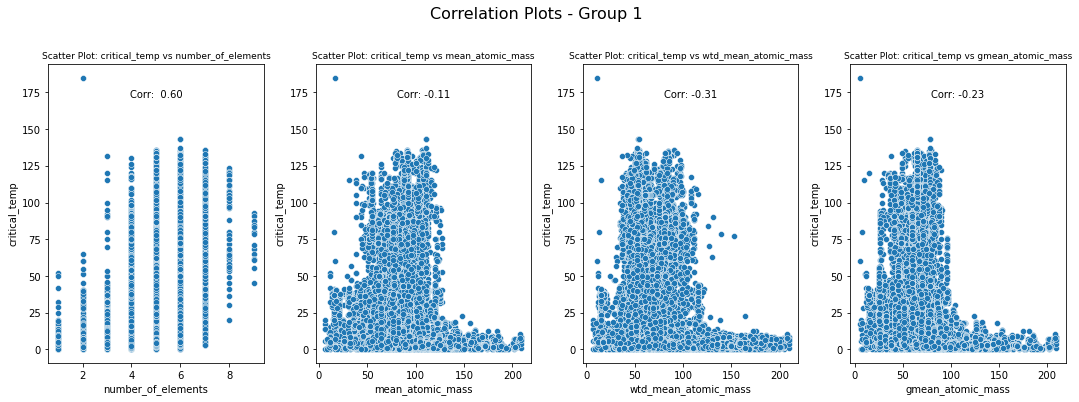

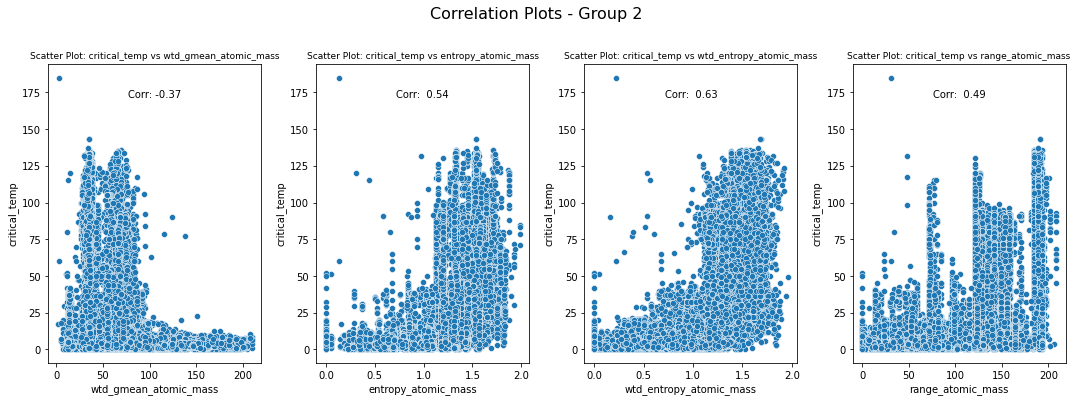

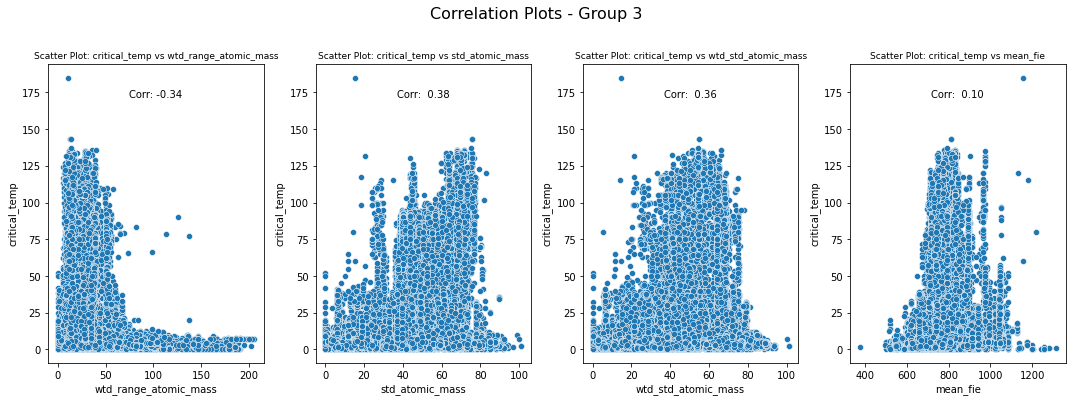

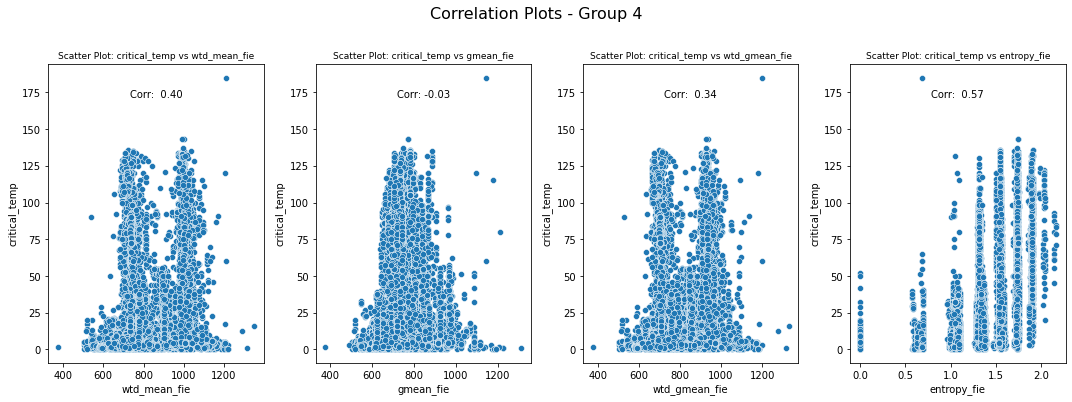

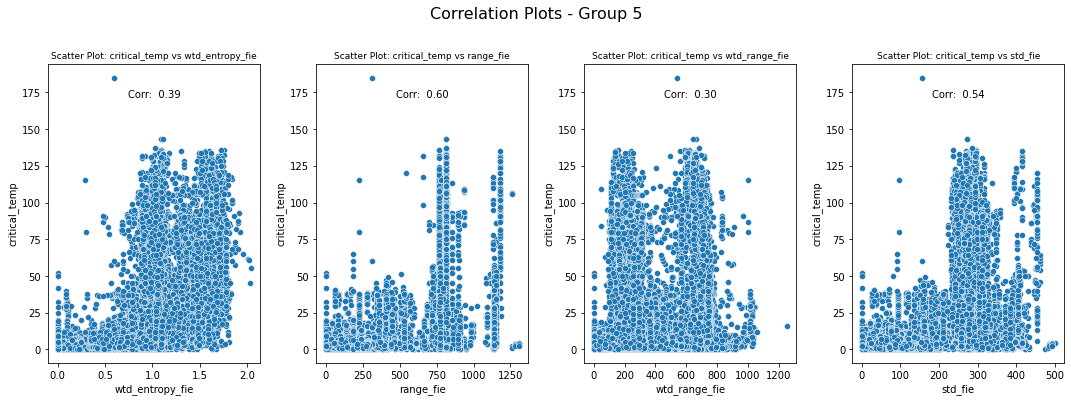

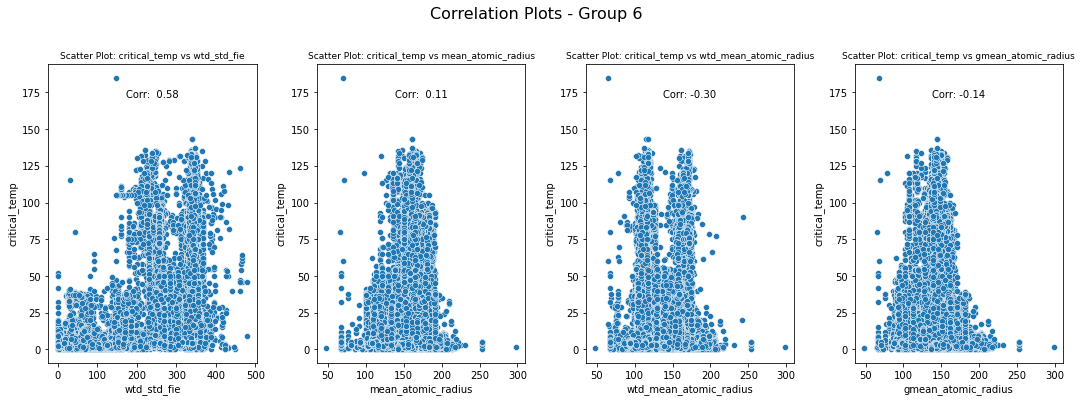

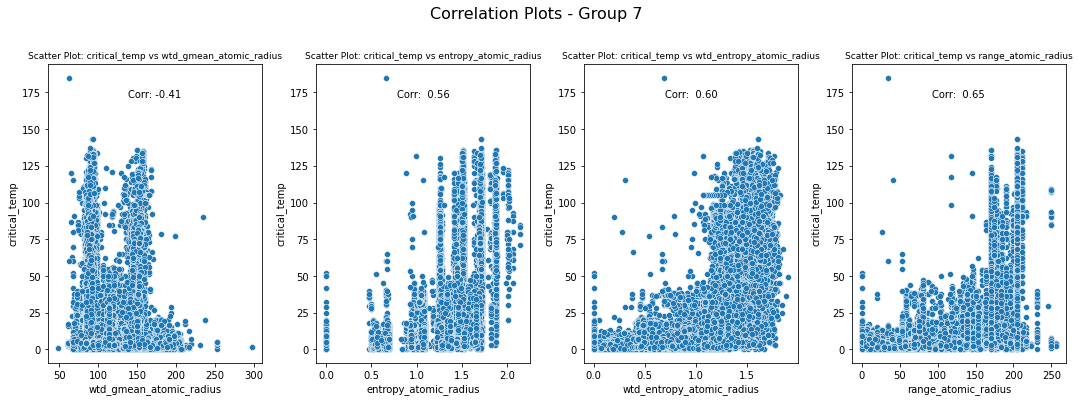

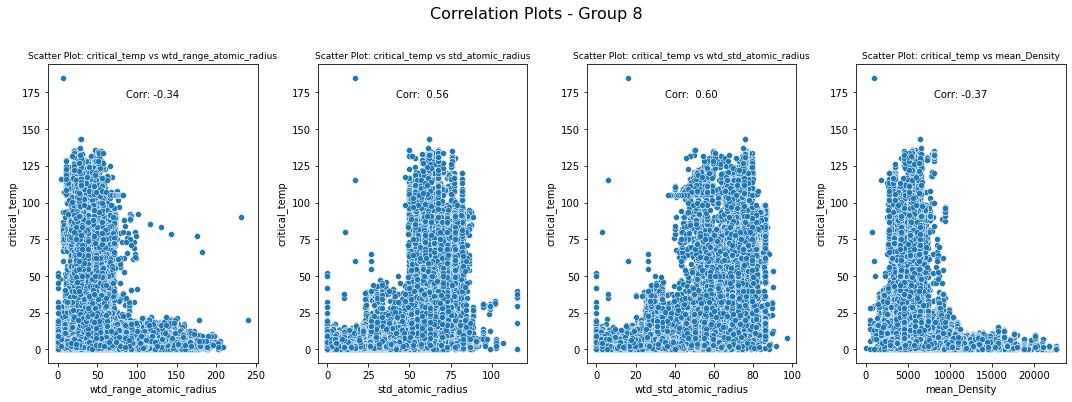

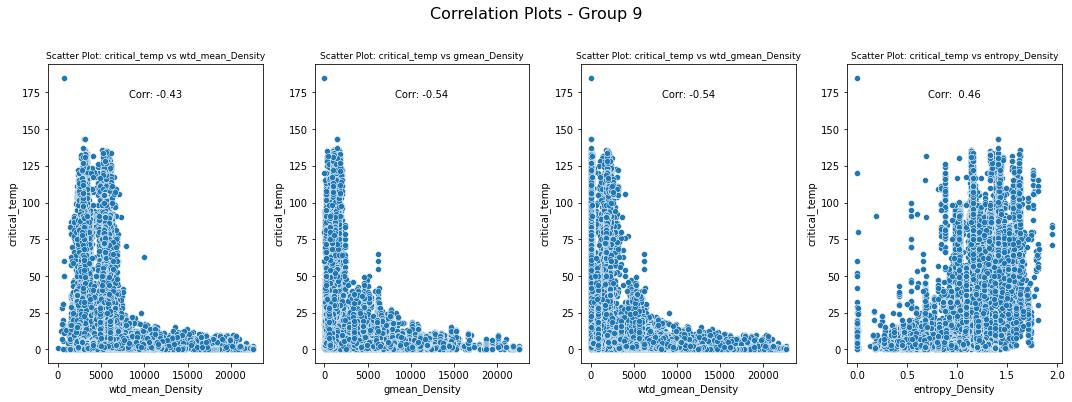

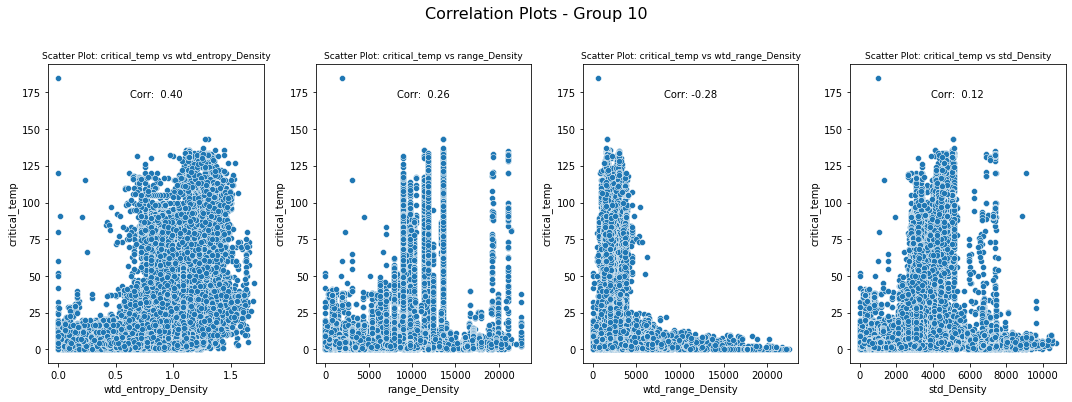

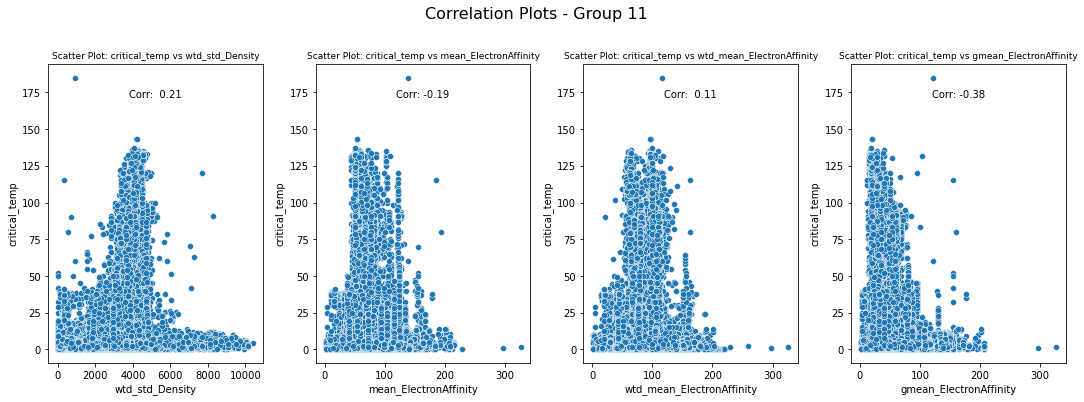

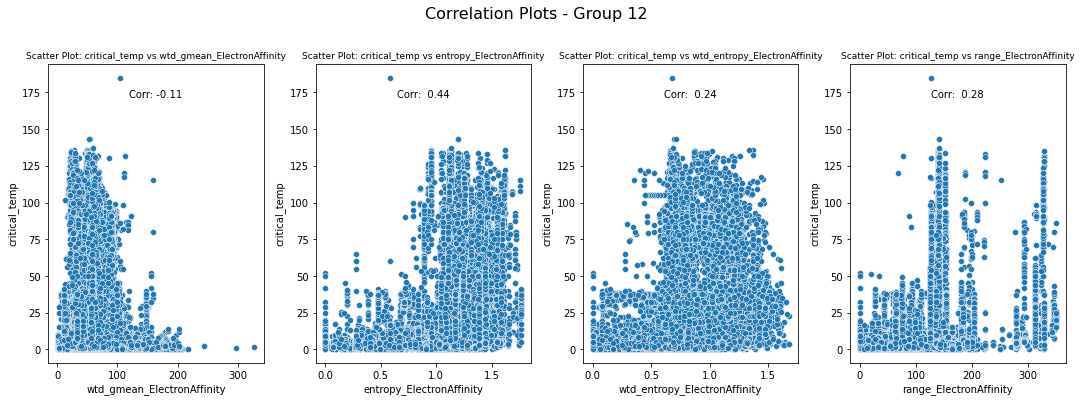

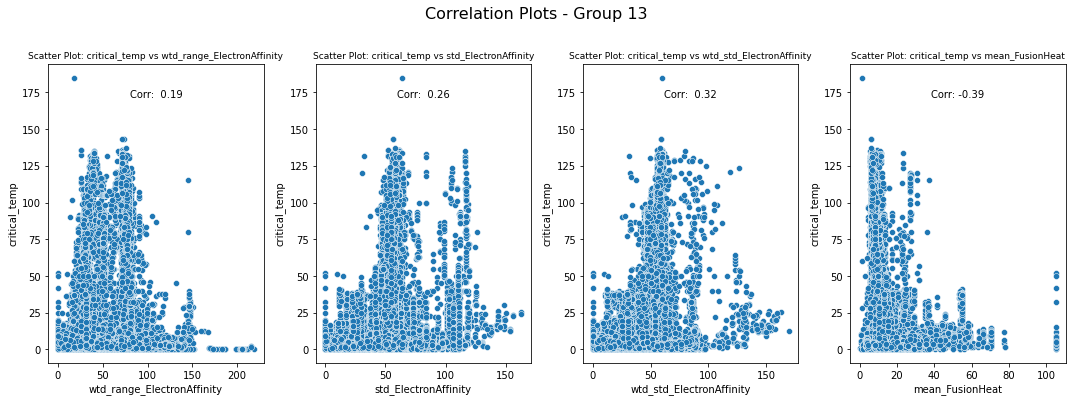

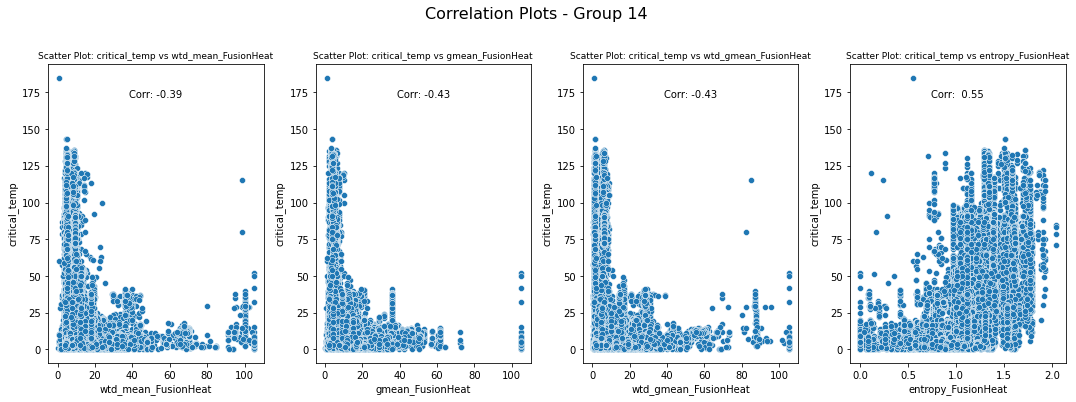

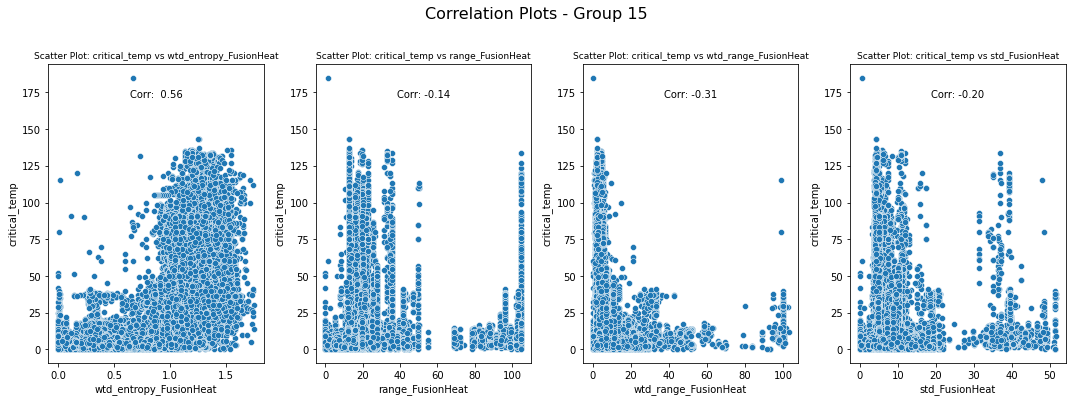

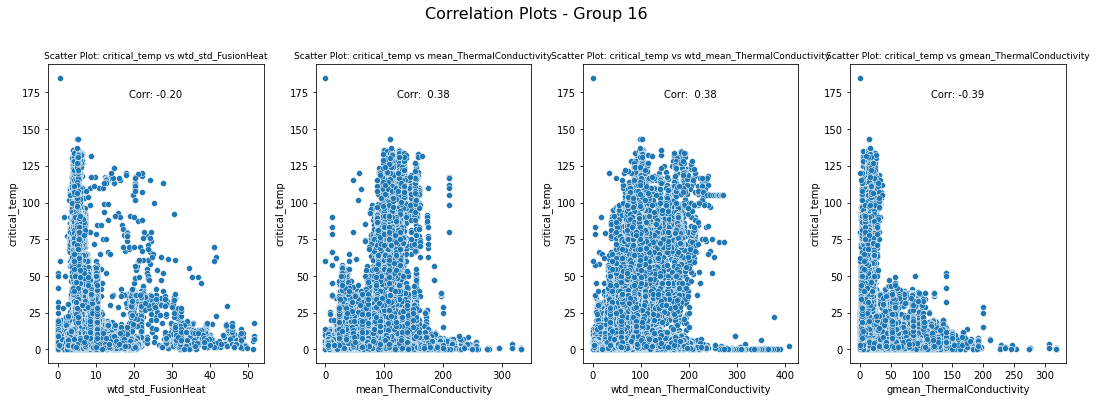

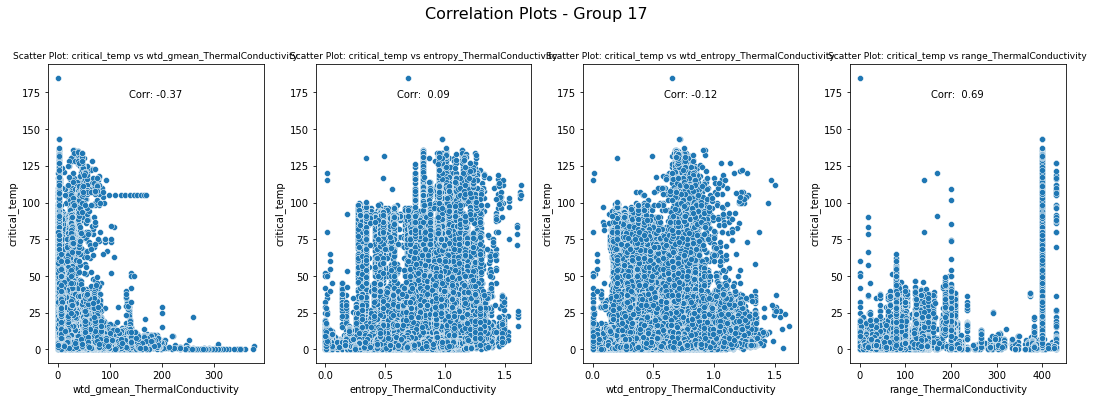

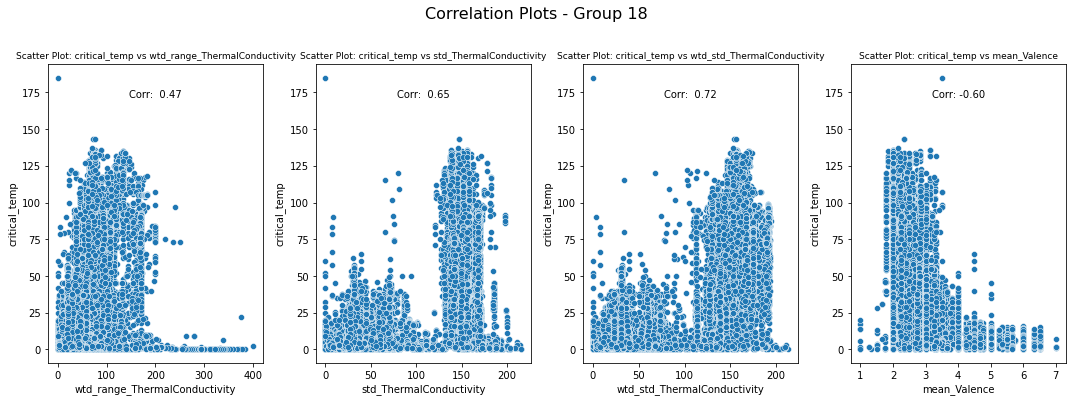

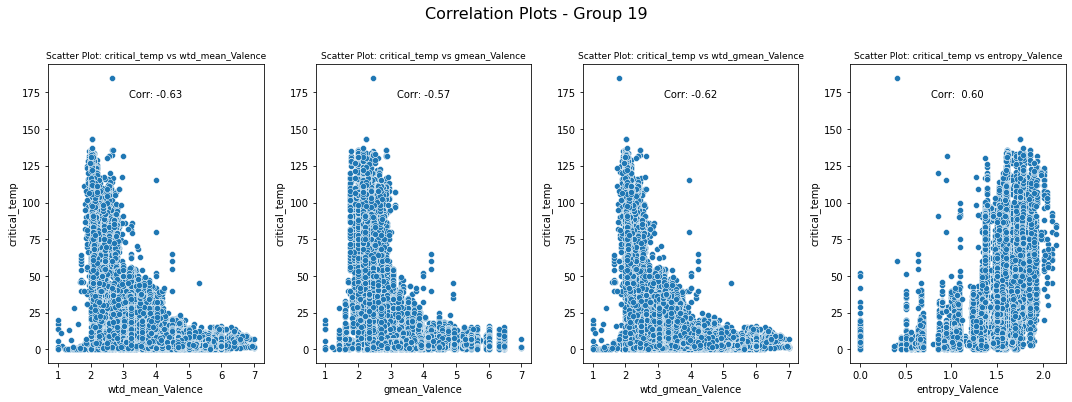

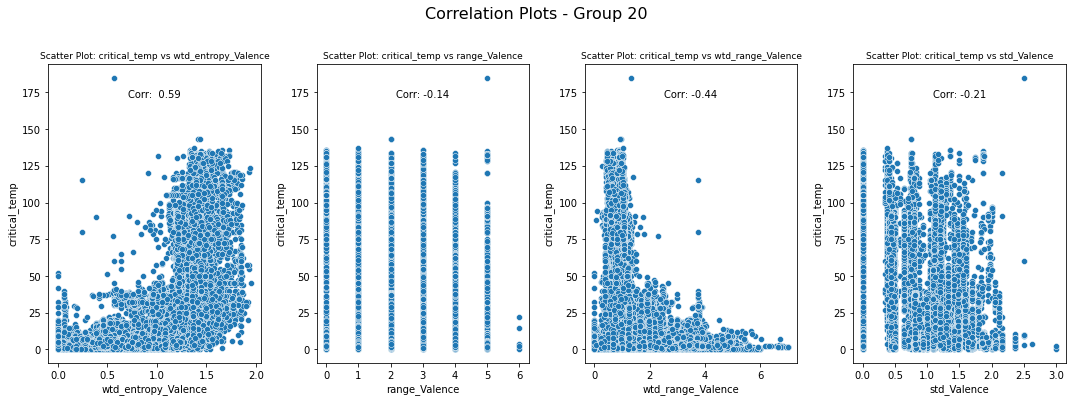

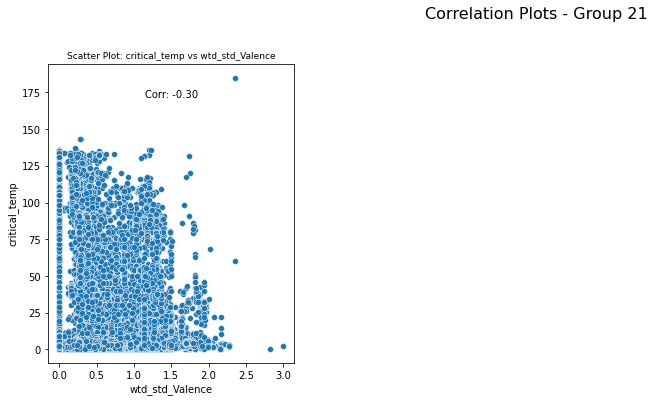

In [37]:
# calculate the correlations
correlations = data.corr()

# list of all features except the target
all_features = data.columns.tolist()
target_variable = 'critical_temp'
all_features.remove(target_variable)

#Define the number of features per group
features_per_group = 4
total_features = len(all_features)
total_groups = (total_features + features_per_group - 1) // features_per_group

# Iterate through groups
for group_num in range(total_groups):
    start_idx = group_num * features_per_group
    end_idx = min((group_num + 1) * features_per_group, total_features)
    selected_features = all_features[start_idx:end_idx]
    
    #Create a new figure for each group 
    plt.figure(figsize=(15,10))
    
    for idx, feature in enumerate(selected_features):
        plt.subplot(2, 4, idx + 1)
        sns.scatterplot(data=data, x=feature, y=target_variable)
        
        # Calcualte correlation coefficient
        corr_coeff = correlations.loc[feature, target_variable]
        
        #Annoate twith correlation coefficients
        plt.text(0.5, 0.9, f'Corr: {corr_coeff: .2f}', horizontalalignment='center',
                verticalalignment='center',transform=plt.gca().transAxes, fontsize=10)
        
        plt.title(f"Scatter Plot: {target_variable} vs {feature}", fontsize = 9) #adjust title size here
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9) #Adjust top spacing for the overall title
    plt.suptitle(f"Correlation Plots - Group {group_num+1}", fontsize = 16) # Overalltitle
    plt.show()

The correlation plot grants insight into what features might have some type of relationship among our response variable critical temp. As we previously explored, there is a positive correlation between the number of elements and the critical temperature. We can note that there is a strong postive corrleation of 0.72 between critical temperature and the weighted standard deviation of Thermal Conductivity, indicating an increase in critical temperature we would have an increase in the weighted standard deviation of Thermal Conductivity. There is a moderate negative correlation of -0.62 between critical temperature and the weighted g-average of valence. 

### Examine the correlations among the features


In [62]:
correlations = data.corr()

#set the correlation threshold
threshold = 0.90

#Create empty lists to store strong relationships 
strong_pos_corr = []
strong_neg_corr = []

# Iterate through the correlation matrix
for feature1 in correlations.columns:
    for feature2 in correlations.index:
        if feature1 !=feature2: # Avoid comparing a feature with itself
            corr_value = correlations.loc[feature2, feature1]
            if corr_value > threshold:
                strong_pos_corr.append((feature2, feature1, corr_value))
            elif corr_value < -threshold:
                strong_neg_corr.append((feature2, feature1, corr_value))

                
# Sort the correlations alphabetically
strong_pos_corr.sort()
strong_neg_corr.sort()
                
# Format results as table
pos_table = tabulate(strong_pos_corr, headers=["Feature 1", "Feature 2", "Correlation"], tablefmt="grid")
neg_table = tabulate(strong_neg_corr, headers=["Feature 1", "Feature 2", "Correlation"], tablefmt="grid")

#Display strong pos correlations
print("Strong Positive Correlations:")
print(pos_table)

print()

#Display strong pos correlations
print("Strong Negative Correlations:")
print(neg_table)
   

Strong Positive Correlations:
+-----------------------------+-----------------------------+---------------+
| Feature 1                   | Feature 2                   |   Correlation |
+=============================+=============================+===============+
| entropy_Density             | entropy_FusionHeat          |      0.917732 |
+-----------------------------+-----------------------------+---------------+
| entropy_Density             | entropy_Valence             |      0.900579 |
+-----------------------------+-----------------------------+---------------+
| entropy_Density             | entropy_atomic_mass         |      0.932668 |
+-----------------------------+-----------------------------+---------------+
| entropy_Density             | entropy_atomic_radius       |      0.91555  |
+-----------------------------+-----------------------------+---------------+
| entropy_Density             | entropy_fie                 |      0.902037 |
+-----------------------------+---

From the correlation table, we can see that the entropy of all of the features contained within the model are extremely positively correlated with all of the other entropy related features. Of the entropy's the strongest correlation is between the entropy of Valence and the entropy of FIE at 0.993 The only two very strong negative correlation that we observe within the study are between the weighted geometric mean of atomic radius and the weighted average of FIE. It makes logicial sense that the features of a particular subgroup are interrelated with a strong correlation to one another. 

## Explore Attributes and Class
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

In this section we want to explore the relationship of minutes delayed when grouping by airline, month, and day of the month. Until we complete the regression and classification portion of our analysis, we won't be able to give hard numbers into the weight of each of these categorical variables. However, this section can show us some fast information about airlines, months, or days of the month to avoid flying.

# Modeling

In [ ]:
##Multi-Nomial Regression with Distance Group/ EXCEPTIONAL WORK

df3= flight_data_df

df4 = df3.select_dtypes(include = ['float','integer'])

#Removing NaN Values
for column in df4.columns:
    if df4[column].isnull().any():
        count = df4[column].isnull().sum()
        print(column + " has " +str(count)+" NaN values")
       
df3_reduced = df4.dropna()

# Dropping columns with less than 2 classes

df3_new = df3_reduced.loc[:, df3_reduced.apply(pd.Series.nunique) > 1]


#df3_new = df3_new.select_dtypes(include = )
#print(X2.dtypes)
X = df3_new.drop('DistanceGroup', axis = 1)
y = df3_new.DistanceGroup


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 50)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


#Scaling the data
#Credit to: https://scikit-learn.org/stable/modules/preprocessing.html
#scaler = preprocessing.StandardScaler().fit(X_train)

#X_scaled = scaler.transform(X)

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Credit to https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
pipe = make_pipeline(StandardScaler(), LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs'))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression())])


final = pipe.score(X_test, y_test)
print('Accuracy with No L2 Penalty')
print('Accuracy with Standardization and Cross Validation: %.3f' % (mean(n_scores)))
print('Accuarcy with Standardization and not Cross Validation: %.3f' % (final))
#Creating Confusion Matrix
#Credit to https://realpython.com/logistic-regression-python/
confusion_matrix(y,pipe.predict(X))
cm = confusion_matrix(y, pipe.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Distance Group 0', 'Predicted Distance Group 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Distance Group 0', 'Actual Distance Group 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


#Creating Output from Models
print(classification_report(y, pipe.predict(X)))

#With L2 Penalty
pipe = make_pipeline(StandardScaler(), LogisticRegression(multi_class = 'multinomial',solver = 'lbfgs', penalty = 'l2',C=.05))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty = 'l2',C=.05)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression())])


final = pipe.score(X_test, y_test)
print('Accuracy with L2 Penalty')
print('Accuracy with Standardization and Cross Validation: %.3f' % (mean(n_scores)))
print('Accuarcy with Standardization and not Cross Validation: %.3f' % (final))

#Creating Confusion Matrix
#Credit to https://realpython.com/logistic-regression-python/
confusion_matrix(y,pipe.predict(X))
cm = confusion_matrix(y, pipe.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Distance Group 0', 'Predicted Distance Group 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Distance Group 0', 'Actual Distance Group 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


#Creating Output from Models
print(classification_report(y, pipe.predict(X)))

From the output above we can see the logistic regression for classifying Distance group is highly accurate. Looking at the Confusion Matrix below, we see there is a difference not only with the implementation of K-Fold Cross Validation, but also with the addition of the L2 Penalty. We are more confident in the models without the L2 penalty as these classify more accurately as well as provide enough room to provide post model adjustments if need be. This is our first attempt at modeling with our Flight dataset and in the future will bring about more robust methods to our modeling. Upon further review of the model, there are many more directions available for us to entertain, but would require a more in depth understanding of modeling within Pandas.